In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv(r'/kaggle/input/netflix-shows/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
data.shape

(8807, 12)

In [18]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
# Drop null and 'Unknown'
country_series = data[data['country'] != 'Unknown']['country'].dropna()

# Split by comma and explode into single country per row
all_countries = country_series.str.split(', ').explode()

# Get unique countries
unique_countries = all_countries.unique()

# Display
print(f"Total unique countries: {len(unique_countries)}")


Total unique countries: 127


In [20]:

data['director'] = data['director'].fillna('Not Available')
data['cast'] = data['cast'].fillna('Not Available')

data['country'] = data['country'].fillna('Unknown')
data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

data.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
data.to_csv()

In [21]:
# Create two new columns: duration_int and duration_type
data['duration_int'] = data['duration'].str.extract('(\d+)').astype('float')
data['duration_type'] = data['duration'].str.extract('([a-zA-Z]+)')

# Check the output
data[['type', 'duration', 'duration_int', 'duration_type']].head(10)

,type,duration,duration_int,duration_type
0,Movie,90 min,90.0,min
1,TV Show,2 Seasons,2.0,Seasons
2,TV Show,1 Season,1.0,Season
3,TV Show,1 Season,1.0,Season
4,TV Show,2 Seasons,2.0,Seasons
5,TV Show,1 Season,1.0,Season
6,Movie,91 min,91.0,min
7,Movie,125 min,125.0,min
8,TV Show,9 Seasons,9.0,Seasons
9,Movie,104 min,104.0,min


In [22]:
df_genres = data[['show_id', 'listed_in']].copy()
df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('listed_in')
df_genres.rename(columns={'listed_in': 'genre'}, inplace=True)
top_genres=df_genres['genre'].value_counts().head(15)
top_genres

genre
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
TV Comedies                  573
Crime TV Shows               469
Kids' TV                     448
Docuseries                   394
Name: count, dtype: int64

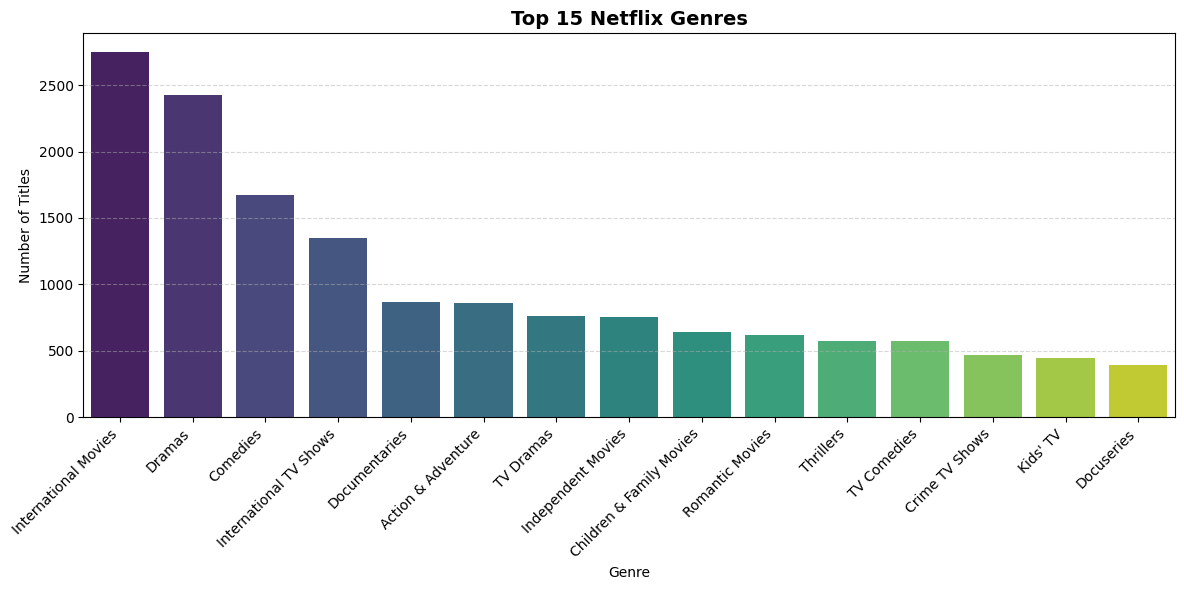

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Netflix Genres', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [24]:
# Explode country and genre
df_country_genre = data[['show_id', 'country', 'listed_in']].copy()

df_country_genre['country'] = df_country_genre['country'].str.split(', ')
df_country_genre['listed_in'] = df_country_genre['listed_in'].str.split(', ')

df_country_genre = df_country_genre.explode('country')
df_country_genre = df_country_genre.explode('listed_in')

# Group and count
country_genre_counts = df_country_genre.groupby(['country', 'listed_in'])['show_id'].count().reset_index()
country_genre_counts.rename(columns={'show_id': 'count', 'listed_in': 'genre'}, inplace=True)

# Pivot for heatmap
top_countries = country_genre_counts['country'].value_counts().head(10).index.tolist()
heatmap_data = country_genre_counts[country_genre_counts['country'].isin(top_countries)]

pivot = heatmap_data.pivot_table(index='genre', columns='country', values='count', fill_value=0)

pivot.head()


country,Australia,Canada,France,Germany,India,Japan,Spain,United Kingdom,United States,Unknown
genre,,,,,,,,,,
Action & Adventure,13.0,44.0,37.0,33.0,137.0,57.0,10.0,84.0,404.0,42.0
Anime Features,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,7.0,8.0
Anime Series,1.0,2.0,0.0,0.0,0.0,141.0,1.0,0.0,18.0,22.0
British TV Shows,5.0,3.0,2.0,6.0,3.0,1.0,5.0,224.0,24.0,16.0
Children & Family Movies,19.0,80.0,23.0,17.0,26.0,19.0,9.0,46.0,390.0,106.0


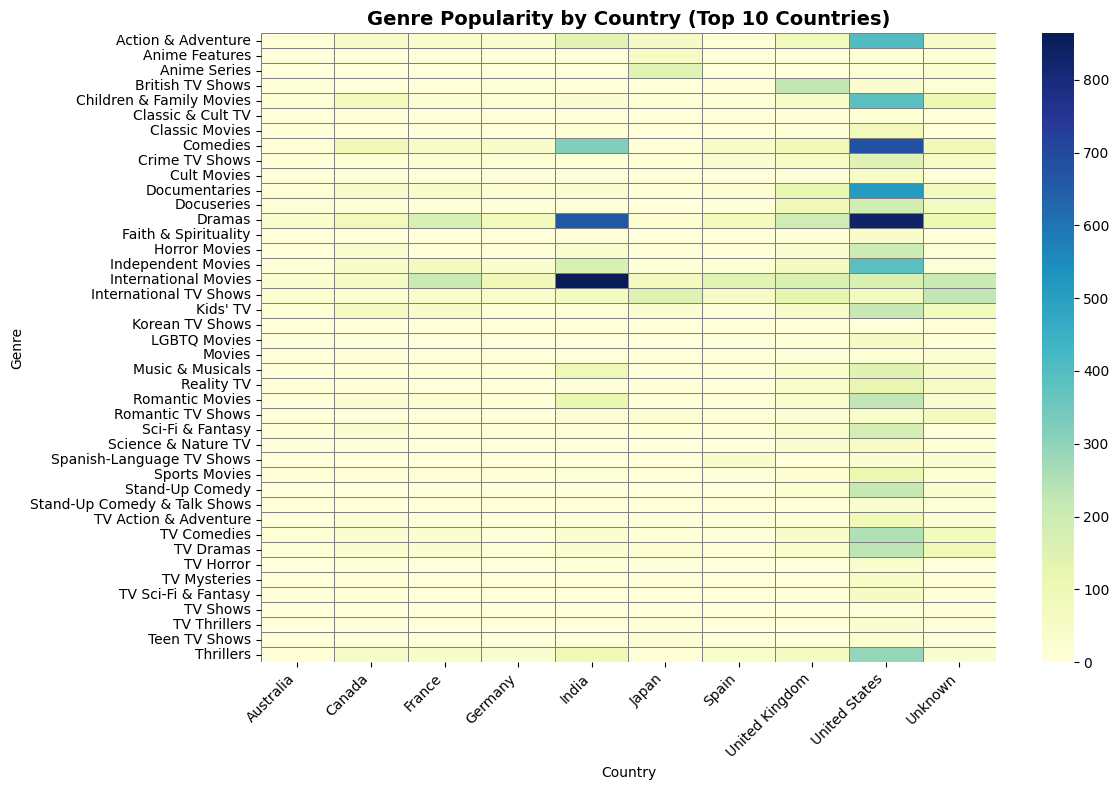

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Genre Popularity by Country (Top 10 Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

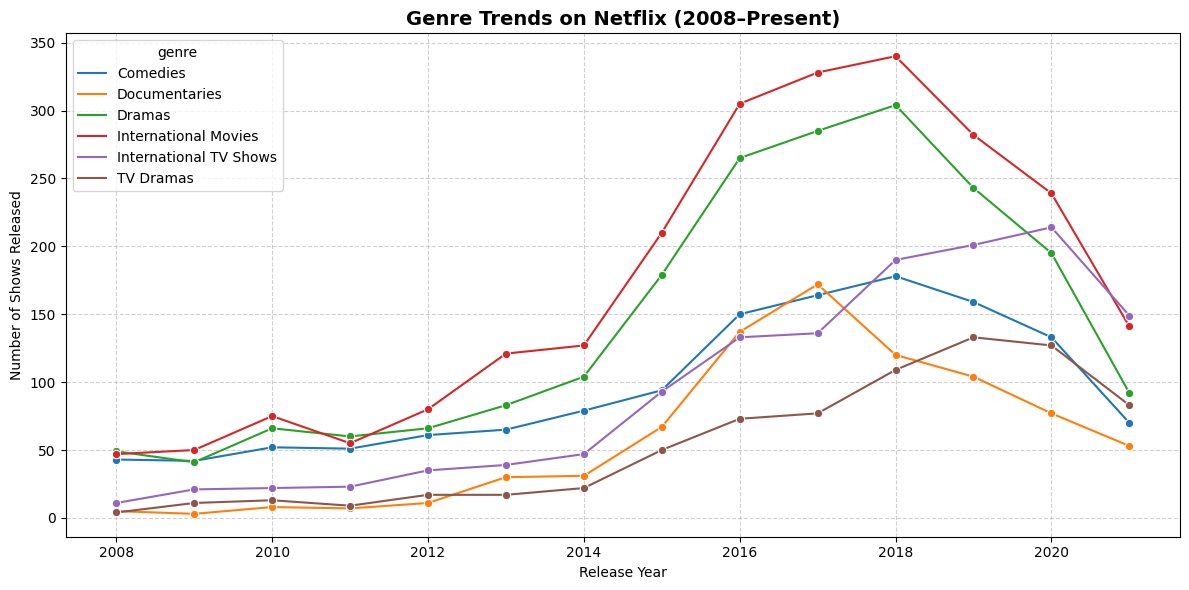

In [26]:
# Reuse genre-exploded data with release year
df_genre_year = data[['release_year', 'listed_in']].copy()
df_genre_year['listed_in'] = df_genre_year['listed_in'].str.split(', ')
df_genre_year = df_genre_year.explode('listed_in')
df_genre_year.rename(columns={'listed_in': 'genre'}, inplace=True)

# Filter to recent years (2008 onwards for cleaner plot)
df_genre_year = df_genre_year[df_genre_year['release_year'] >= 2008]

# Top 6 genres to track
top_6_genres = df_genre_year['genre'].value_counts().head(6).index.tolist()

# Filter only top genres
df_top_genres = df_genre_year[df_genre_year['genre'].isin(top_6_genres)]

# Group by year and genre
genre_trends = df_top_genres.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trends, x='release_year', y='count', hue='genre', marker='o', palette='tab10')

plt.title('Genre Trends on Netflix (2008–Present)', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows Released')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


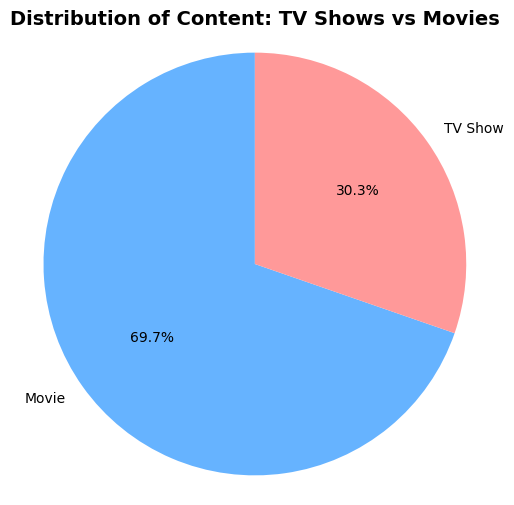

In [27]:
# Count of each type
type_counts = data['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])

plt.title('Distribution of Content: TV Shows vs Movies', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


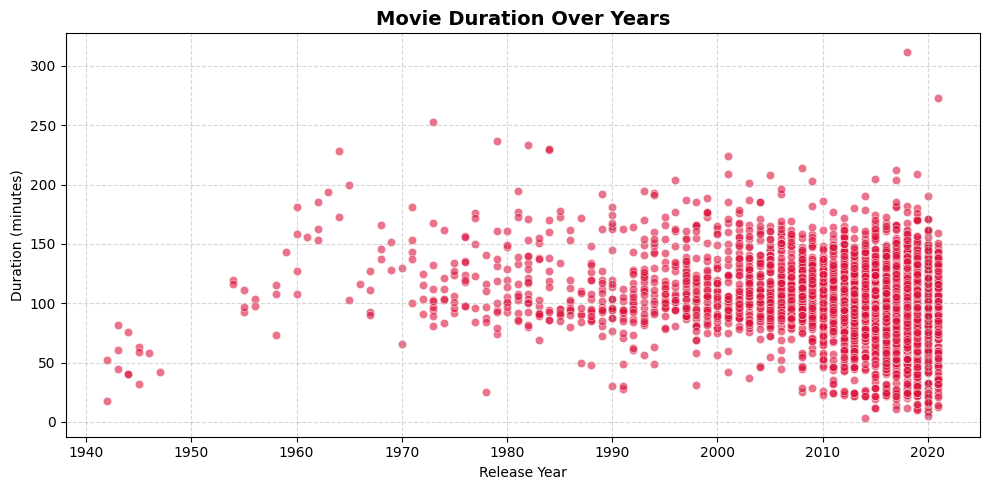

In [28]:
# Filter only Movies
df_movies = data[data['type'] == 'Movie']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_movies, x='release_year', y='duration_int', alpha=0.6, color='crimson')

plt.title('Movie Duration Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [29]:
df=data[data['country']=='India']
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166.0,min
39,s40,TV Show,Chhota Bheem,Not Available,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",3.0,Seasons
50,s51,TV Show,Dharmakshetra,Not Available,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",1.0,Season
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,Not Available,Not Available,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,1.0,Season


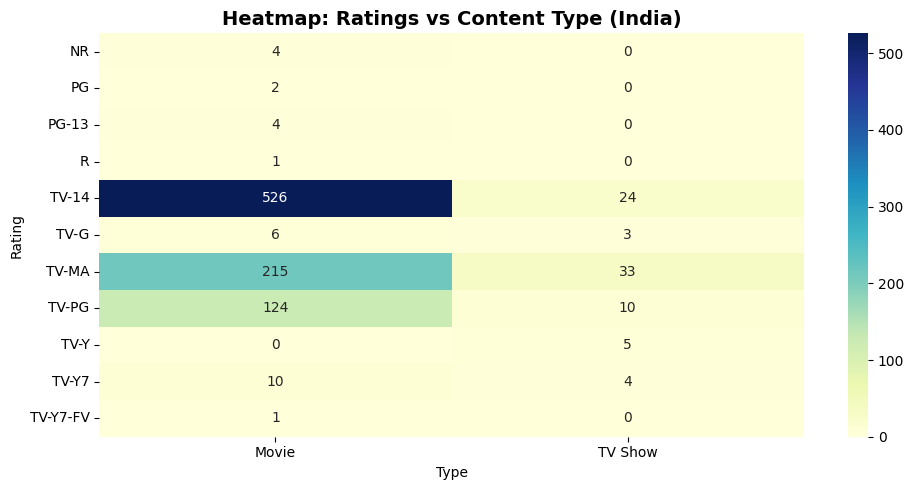

In [30]:
plt.figure(figsize=(10, 5))
rating_type = pd.crosstab(df['rating'], df['type'])

sns.heatmap(rating_type, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Ratings vs Content Type (India)', fontsize=14, fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

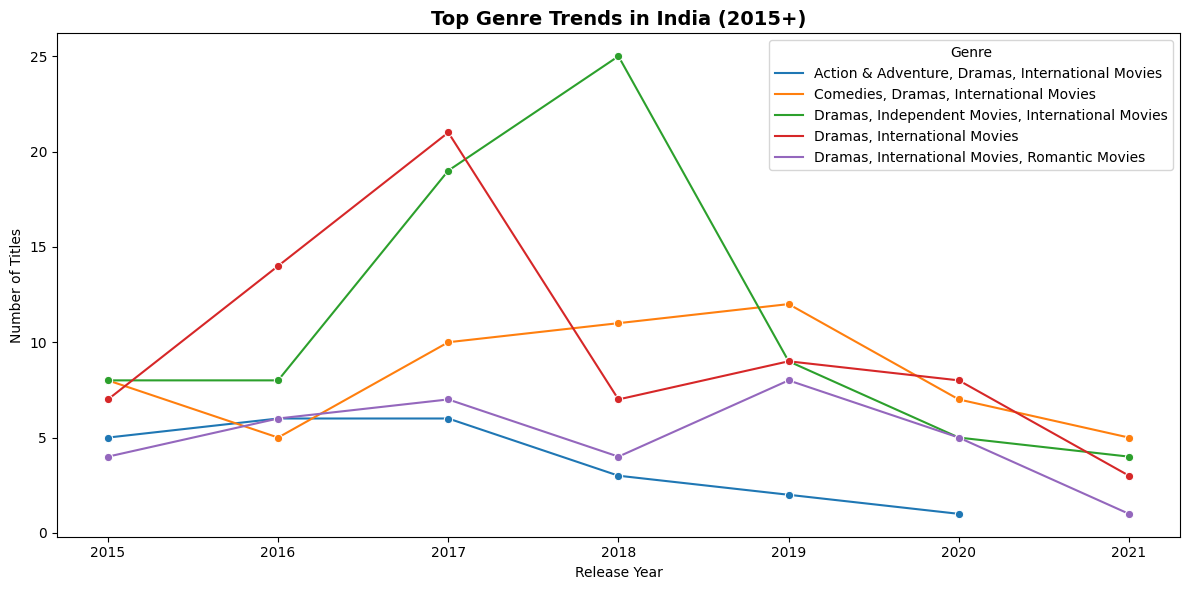

In [31]:
df_india_genre_trend = df.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Filter for recent years
df_recent = df_india_genre_trend[df_india_genre_trend['release_year'] >= 2015]

plt.figure(figsize=(12, 6))
top_genres_india = df['listed_in'].value_counts().head(5).index

sns.lineplot(data=df_recent[df_recent['listed_in'].isin(top_genres_india)],
             x='release_year', y='count', hue='listed_in', marker='o', palette='tab10')

plt.title('Top Genre Trends in India (2015+)', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


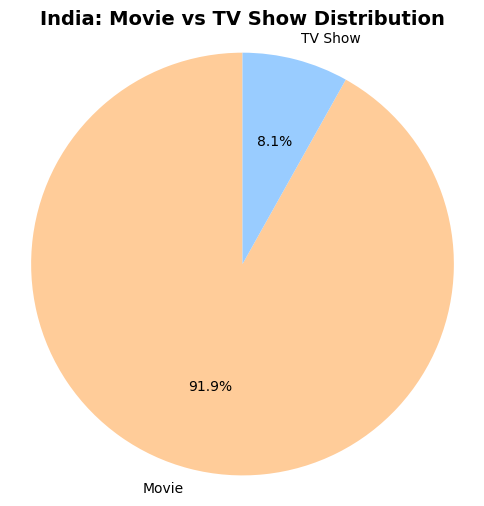

In [32]:
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ffcc99','#99ccff'], startangle=90)

plt.title('India: Movie vs TV Show Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()


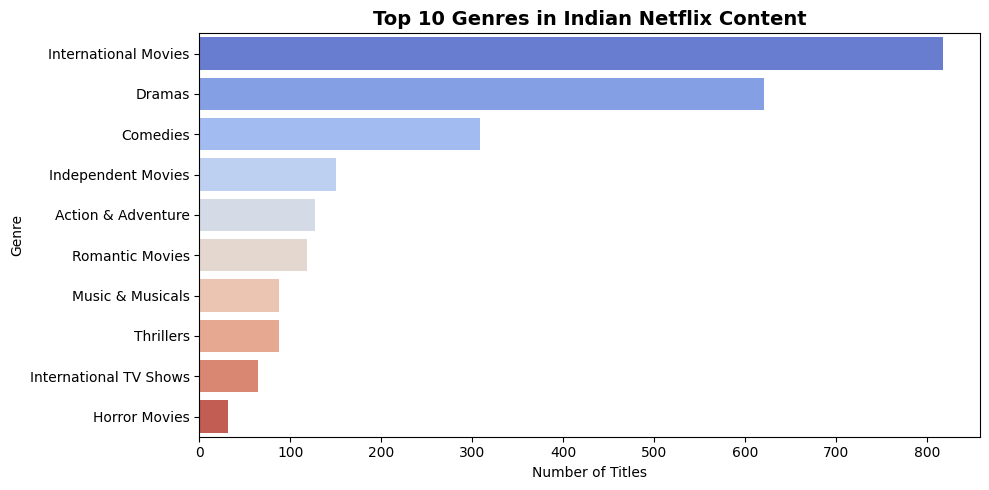

In [33]:
# Explode genre
df_india_genre = df.copy()
df_india_genre['listed_in'] = df_india_genre['listed_in'].str.split(', ')
df_india_genre = df_india_genre.explode('listed_in')

plt.figure(figsize=(10, 5))
sns.countplot(data=df_india_genre, y='listed_in', order=df_india_genre['listed_in'].value_counts().head(10).index, palette='coolwarm')

plt.title('Top 10 Genres in Indian Netflix Content', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

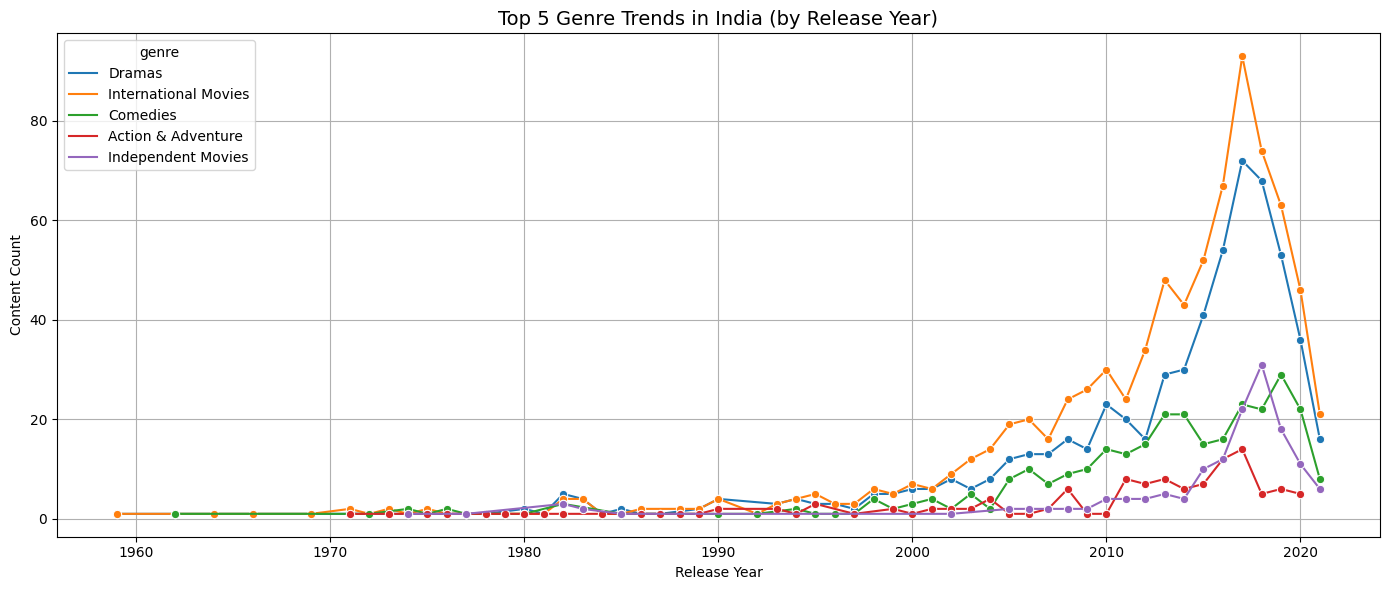

In [34]:
# Explode genres to analyze each separately
df_india_genre = df.copy()
df_india_genre['genre'] = df_india_genre['listed_in'].str.split(', ')
df_india_genre = df_india_genre.explode('genre')

# Group and plot
genre_trend = df_india_genre.groupby(['release_year', 'genre']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
top_genres_india = genre_trend.groupby('genre')['count'].sum().sort_values(ascending=False).head(5).index
sns.lineplot(data=genre_trend[genre_trend['genre'].isin(top_genres_india)],
             x='release_year', y='count', hue='genre', marker='o')

plt.title('Top 5 Genre Trends in India (by Release Year)', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Content Count')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


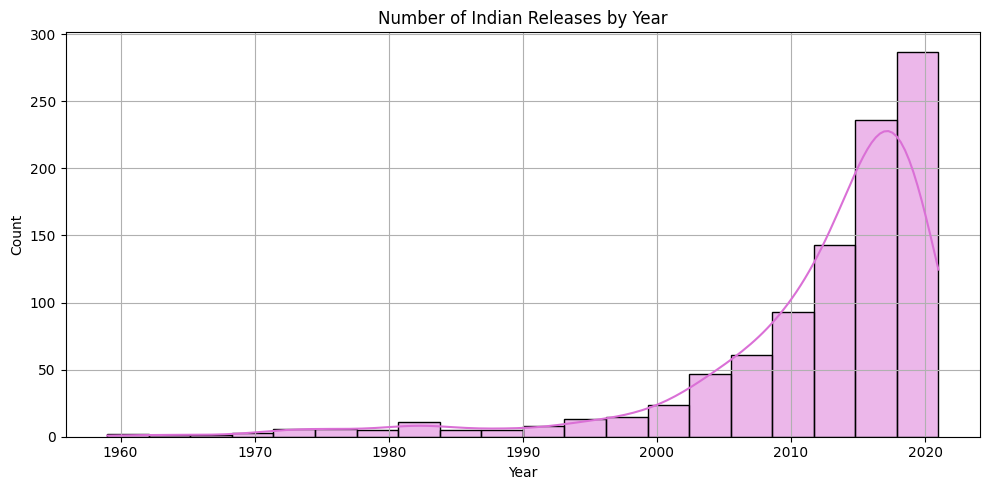

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='release_year', bins=20, kde=True, color='orchid')
plt.title('Number of Indian Releases by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


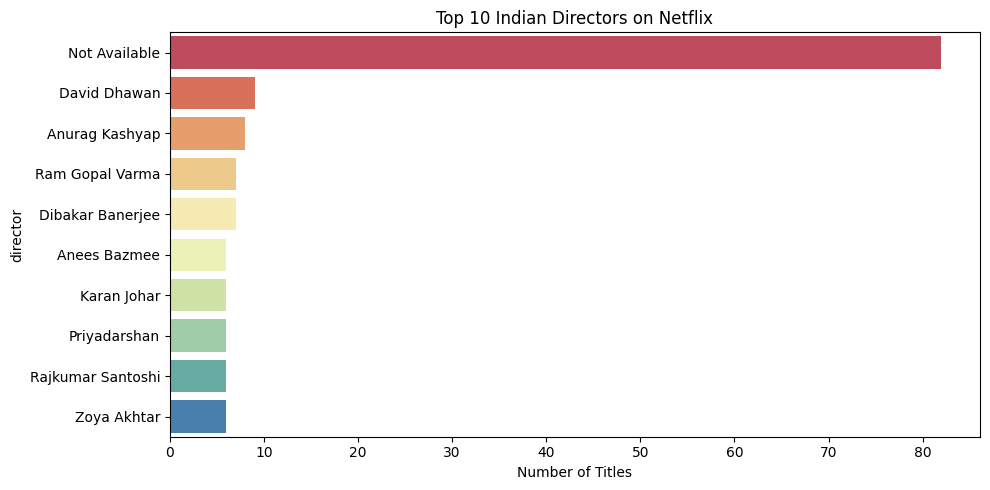

In [36]:
top_directors = df['director'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Spectral')
plt.title('Top 10 Indian Directors on Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()


In [37]:
df.to_csv("Netflix India.csv")